In [134]:
import pandas as pd

In [135]:
from sklearn.datasets import load_boston

In [136]:
dataset = load_boston()

In [137]:
## NATHAN MARTINS CUNHA - 0050011108

In [138]:
dataset.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [139]:
type(dataset)

sklearn.utils.Bunch

In [140]:
dataset.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [141]:
print(dataset.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [142]:
names = dataset.feature_names
print("Numero features: "+ str(names.size))


Numero features: 13


In [143]:
## Numero features: 13

In [144]:
target =  dataset.target

In [145]:
print(names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [146]:
dataset = pd.DataFrame(dataset.data, columns=dataset.feature_names)

In [147]:
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [148]:
## RESPONSE : LSTAT

In [149]:
import seaborn as sns

In [150]:
%matplotlib inline

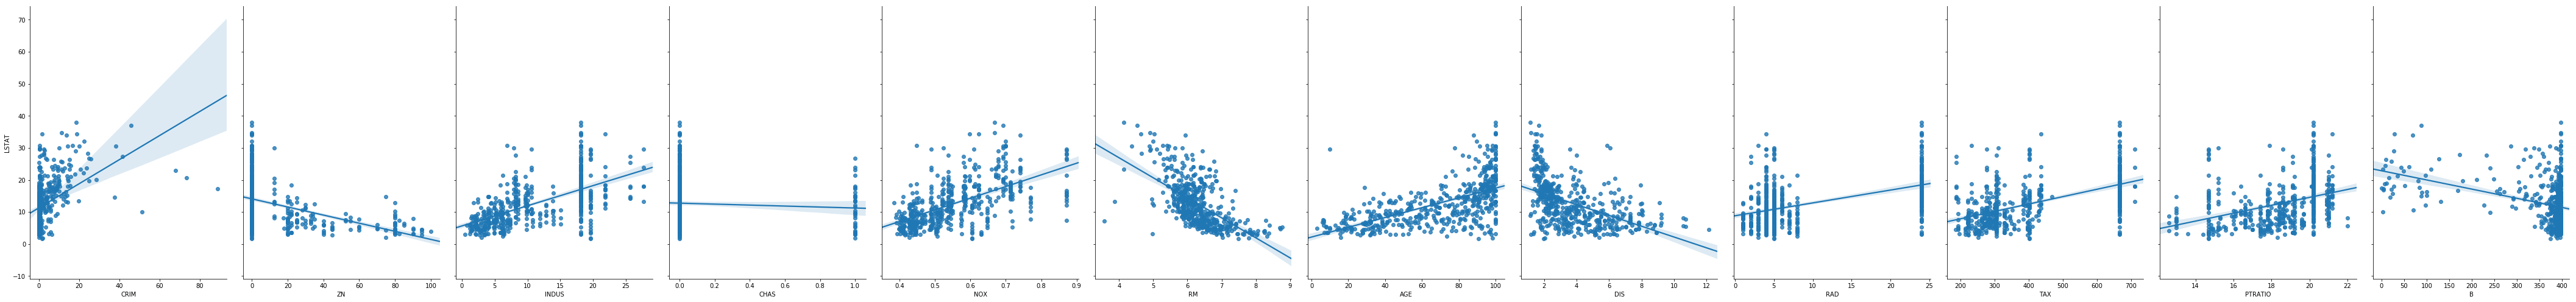

In [151]:
sns.pairplot(dataset, x_vars=['CRIM','ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS','RAD','TAX','PTRATIO','B'], y_vars='LSTAT', height=7, aspect=0.7, kind='reg')

In [152]:
feature_cols = ['CRIM','ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS','RAD','TAX','PTRATIO','B']

In [153]:
X = dataset[feature_cols]

In [156]:
print(type(X))

<class 'pandas.core.frame.DataFrame'>


In [157]:
y = dataset['LSTAT']

In [158]:
print(type(y))

<class 'pandas.core.series.Series'>


In [159]:
## Fala sobre as moradias de Boston e outros indices 

In [161]:
from sklearn.model_selection import train_test_split

In [162]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [163]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(379, 12)
(379,)
(127, 12)
(127,)


In [164]:
## Percentual Default 75% para treino e 25 % teste

In [165]:
from sklearn.linear_model import LinearRegression


In [166]:
linreg = LinearRegression()

In [167]:
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [168]:
print(linreg.intercept_)
print(linreg.coef_)

29.18427269737786
[ 9.35708298e-02  1.83084770e-02  1.03147438e-01 -5.42676000e-01
  5.13563756e+00 -4.39346872e+00  1.02007222e-01  2.46576181e-01
  5.27952825e-02 -1.85506376e-03  1.06236767e-01 -8.25326474e-03]


In [169]:
list(zip(feature_cols, linreg.coef_))

[('CRIM', 0.09357082978146847),
 ('ZN', 0.018308476974244144),
 ('INDUS', 0.103147438237016),
 ('CHAS', -0.5426760001416825),
 ('NOX', 5.135637563577652),
 ('RM', -4.393468723280021),
 ('AGE', 0.10200722205460269),
 ('DIS', 0.2465761813370218),
 ('RAD', 0.05279528253852997),
 ('TAX', -0.0018550637643145061),
 ('PTRATIO', 0.1062367673633647),
 ('B', -0.008253264743275656)]

In [170]:
y_pred = linreg.predict(X_test)

In [171]:
print(y_pred)

[ 8.9437467   8.98875357 14.23751865  8.41455662 21.15870581 15.73618349
  6.31430367 16.23006005 15.26299127  9.62296363 12.05695081  5.57490118
 13.3670177  10.44301429 14.81332282 20.86972047 15.74598241  1.85735865
  9.20100096 22.22391616 15.18714917 21.40796341 12.31159222  8.11787772
  6.87565958 22.43507188 16.79005087 10.73081248  7.89085481 21.14465508
  8.30635709 15.49479482  0.69172611 17.68362728  7.7915654  10.46682836
 17.47838623  5.84865024 27.80717188 15.66744784  5.21583594  8.94554048
 10.88375916 17.734398   17.43155341 15.88652174  8.0448376  18.99735894
 16.92567453 15.18743074 10.57842926 10.09439829  9.47707592 15.71068953
 21.66228214 11.55405232 17.52035679 10.53965687 14.60795174  2.88121717
 17.81550988  8.07462043 19.50336113 17.73316068  9.71535504  6.35364124
  2.79298411  8.68431285 10.24255242 16.5800031   7.5957251  25.95469425
 22.6046238  12.24363241 13.61785788 12.78811033 12.72050519  6.99086209
 15.91636917  4.48111434 15.32511118 13.84066752  4

In [175]:
from sklearn import metrics
import numpy as np

In [179]:
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

4.153873547486129
